In [1]:
import pandas as pd
import numpy as np
import pickle
import os

import altair as alt

#other libraries from lib
import sys
sys.path.append('../')
sys.path.append('../../')
from lib.builders import people,towns,nations,culture as c
import lib.drawMaps as draw

with (open('world_1.p', 'rb')) as pickle_file:
    world = pickle.load(pickle_file)
    
world

In [2]:
c.Names(paths='notebooks')

In [3]:
culture = c.Culture(paths='notebooks')
culture.eons

10

# The age of the ancients

the terrain and all of the natural features are formed in the first age. Mountains, rivers, lakes, forrests. Once the land has settle, the first cities appear. 

Culture settings come from the user input, there are defaults for everything. Once specified the `.culture` placeholder can be replaced. It should not be used until this point. 

In [4]:
world.culture = culture

#### Blank world from the `landscape` age

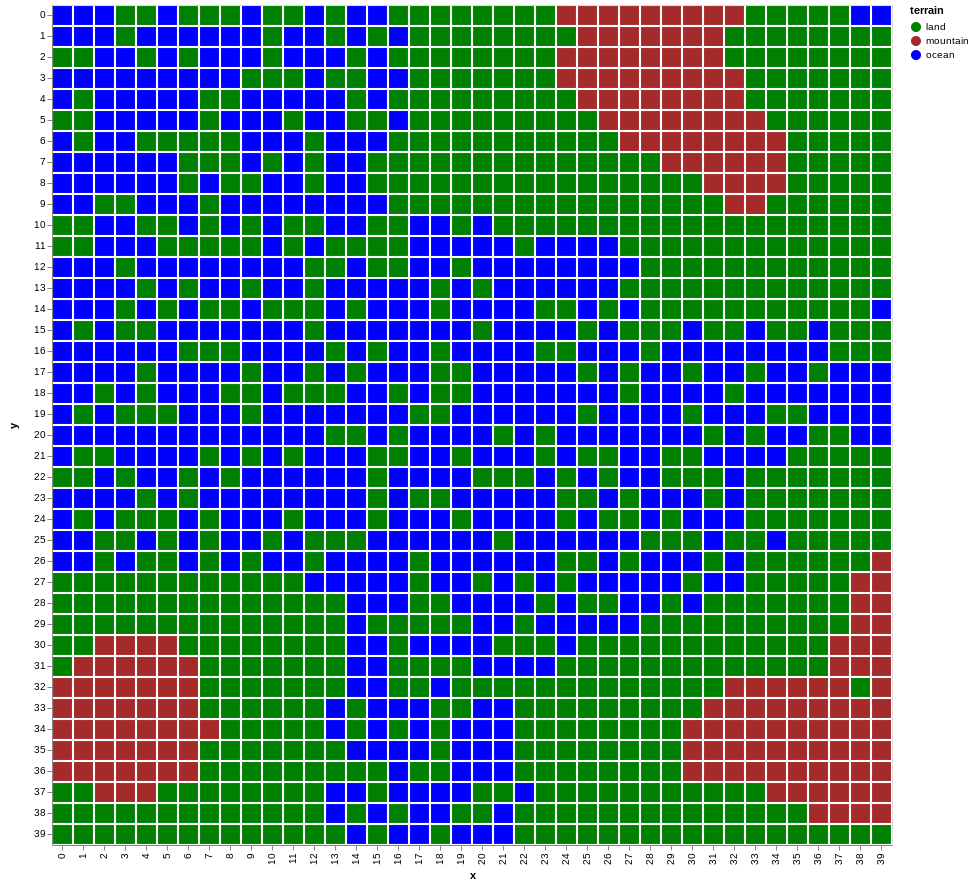

In [5]:
draw.drawTerrainTypes(world.grid_elevation,world.landscape)

the `__init__` method of a city takes a founding age and a location (which can be generated randomly via `World.get_random_chord`). The init method automatically generates a name. The default nation is the name of the town.

## People
A `Person` is a required parameter for many things like `towns`, `nations` and `buildings`

A person requires a `culture` to specify how the names will be generated. As a default the person is a `peon` and exists nowhere (`None`). Optional parameters allow the person to be created with a `role` and a `location`. `Location` can be a `town`, `building` or a `key` where the person can be found. 

In [6]:
people.Person(world.culture,location=world.get_random_chord())

Nafaddash, peon, residing in [39 27]

When a new `Town` is created it is created with a person

In [7]:
new_town = towns.Town(world.get_random_chord(),1,culture,people)
new_town

town of Brinecoil: population: 1 location: [26,33] founded 1

In [8]:
new_town.speaker

Elicanen, Speaker of Brinecoil, residing in Brinecoil

## The age of civilization

Cities grow for a set number of aeons. During each eon
* n new villages are born
* each village has g% chance to grow

at the end of this age cities merge together to become nations. 

In [9]:
all_towns = towns.build_towns(world,people)
all_towns

[town of Artcatch: population: 2 location: [15,7] founded 0,
 town of Stormmoral: population: 4 location: [38,35] founded 0,
 town of Buckcraft: population: 2 location: [29,1] founded 1,
 town of Foundersring: population: 5 location: [4,17] founded 2,
 town of Artvale: population: 4 location: [37,28] founded 2,
 town of Stonepike: population: 3 location: [29,36] founded 3,
 town of Ragegarden: population: 3 location: [17,19] founded 3,
 town of Stormhenge: population: 5 location: [27,30] founded 3,
 town of Hellloch: population: 3 location: [31,11] founded 4,
 town of Splitmain: population: 6 location: [12,18] founded 4,
 town of Doomblade: population: 3 location: [27,35] founded 5,
 town of Leafpike: population: 3 location: [29,22] founded 6,
 town of Corering: population: 2 location: [36,17] founded 6,
 town of Gleamcrest: population: 1 location: [2,25] founded 7,
 town of Hellcatch: population: 1 location: [31,34] founded 7,
 town of Corecrest: population: 1 location: [12,18] founde

In [10]:
[p.speaker for p in all_towns]

[Deppen, Speaker of Artcatch, residing in Artcatch,
 Kafarrenton, Speaker of Stormmoral, residing in Stormmoral,
 Brohis, Speaker of Buckcraft, residing in Buckcraft,
 Xissow, Speaker of Foundersring, residing in Foundersring,
 Devac, Speaker of Artvale, residing in Artvale,
 Lablett, Speaker of Stonepike, residing in Stonepike,
 Retendach, Speaker of Ragegarden, residing in Ragegarden,
 Ansof, Speaker of Stormhenge, residing in Stormhenge,
 Soffif, Speaker of Hellloch, residing in Hellloch,
 Thonsove, Speaker of Splitmain, residing in Splitmain,
 Jommob, Speaker of Doomblade, residing in Doomblade,
 Trappseh, Speaker of Leafpike, residing in Leafpike,
 Brabloe, Speaker of Corering, residing in Corering,
 Kaboldundle, Speaker of Gleamcrest, residing in Gleamcrest,
 Vaxorb, Speaker of Hellcatch, residing in Hellcatch,
 Drockseb, Speaker of Corecrest, residing in Corecrest,
 Broddad, Speaker of Flamemore, residing in Flamemore,
 Eloklipove, Speaker of Heartjaw, residing in Heartjaw,
 Sha

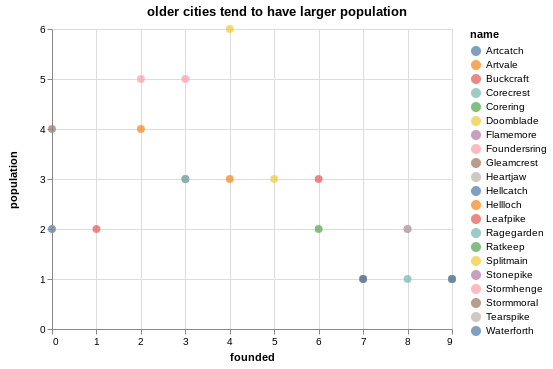

In [11]:
def population_age(towns):
    df = pd.DataFrame(index=range(len(all_towns)))
    df['name'] = [t.name for t in all_towns]
    df['population'] = [t.pop for t in all_towns]
    df['founded'] = [t.founded for t in all_towns]
    return df

alt.Chart(population_age(towns),title="older cities tend to have larger population").mark_circle(size=60).encode(
    y='population',
    x='founded',
    color='name',
    tooltip=['name']
)

There are convinience functions to fetch individual towns. 

In [12]:
towns.get_town(all_towns,all_towns[2].name)

town of Buckcraft: population: 2 location: [29,1] founded 1

In [13]:
world.df_features.head()

,y,rainfall,x,key,elevation,terrain
key,,,,,,
0:0,0,11.0,0,0:0,-2.0,ocean
1:0,0,12.0,1,1:0,0.0,ocean
2:0,0,12.0,2,2:0,0.0,ocean
3:0,0,12.0,3,3:0,1.0,land
4:0,0,7.0,4,4:0,1.0,land


In [14]:
world.add_features(all_towns)

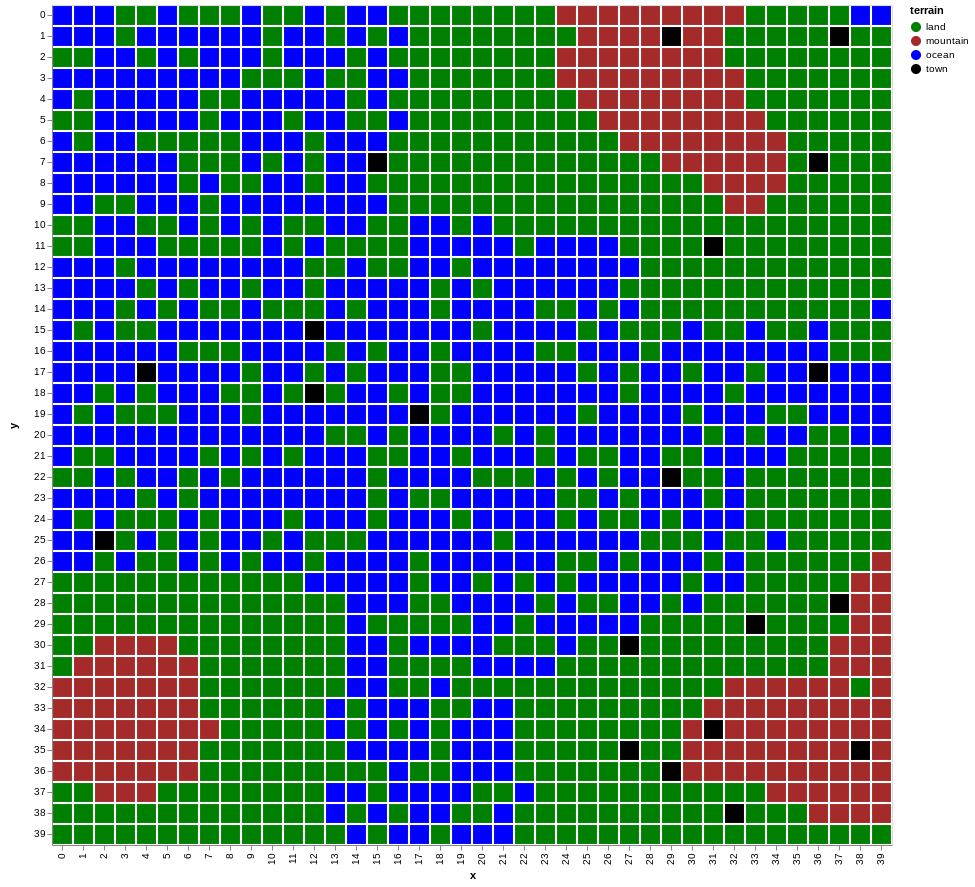

In [15]:
draw.drawCities(world.df_features)

In [16]:
world.df_features[world.df_features['feature'].isna()==False]

,y,rainfall,x,key,elevation,terrain,feature
key,,,,,,,
29:1,1,43.0,29,29:1,43.0,town,Buckcraft
37:1,1,10.0,37,37:1,4.0,town,Heartjaw
15:7,7,2.0,15,15:7,1.0,town,Artcatch
36:7,7,31.0,36,36:7,14.0,town,Waterforth
31:11,11,14.0,31,31:11,9.0,town,Hellloch
12:15,15,17.0,12,12:15,1.0,town,Flamemore
4:17,17,8.0,4,4:17,1.0,town,Foundersring
36:17,17,11.0,36,36:17,1.0,town,Corering
12:18,18,23.0,12,12:18,1.0,town,Corecrest


In [17]:
#k is the actual k_means cluster object.
all_nations,k = nations.cluster_nations(world)

world.nations = all_nations

all_nations

{0: 'Heartblade',
 1: 'Ragetear',
 2: 'Camspike',
 3: 'Clearglen',
 4: 'Snakemark',
 5: 'Hellkeep',
 6: 'Flameloch',
 7: 'Flamefort'}

In [18]:
k

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
world.df_features = nations.predict_nations(k,world)
world.df_features.head(20)

,y,rainfall,x,key,elevation,terrain,feature,nation number,nation
key,,,,,,,,,
0:0,0,11.0,0,0:0,-2.0,ocean,NaN,NaN,NaN
1:0,0,12.0,1,1:0,0.0,ocean,NaN,NaN,NaN
2:0,0,12.0,2,2:0,0.0,ocean,NaN,NaN,NaN
3:0,0,12.0,3,3:0,1.0,land,NaN,5.0,Hellkeep
4:0,0,7.0,4,4:0,1.0,land,NaN,5.0,Hellkeep
5:0,0,0.0,5,5:0,-1.0,ocean,NaN,NaN,NaN
6:0,0,2.0,6,6:0,2.0,land,NaN,5.0,Hellkeep
7:0,0,1.0,7,7:0,1.0,land,NaN,5.0,Hellkeep
8:0,0,2.0,8,8:0,2.0,land,NaN,5.0,Hellkeep


In [20]:
world.towns

In [21]:
world.towns = all_towns
for t in all_towns:
    try:
        t.set_starting_fielty(world)
    except:
        continue
        
town = world.towns[1]
print(f"{town.name} is loyal to the nation of {town.nation}")
print(f"{town.diplomacy}")

Stormmoral is loyal to the nation of Clearglen
{'nation': 'Clearglen', 'national fealty': 1}


In [22]:
#for each nation (n), appoint the most populus city (c) as it's capitol.
for n in np.unique(world.df_features['nation'].dropna()):
    c = world.df_features[(world.df_features['nation']==n)& \
          (world.df_features['terrain']=='town')]['feature'].tolist()
    #getting the town objects
    ts = [t for t in all_towns if t.name in c]
    #get population(p)
    p = [t.pop for t in ts]
    #getting the first town that has the max population, make that the capitol
    ts[np.argmax(p)].type='capitol'
    
all_towns

[capitol of Artcatch: population: 2 location: [15,7] founded 0,
 capitol of Stormmoral: population: 4 location: [38,35] founded 0,
 capitol of Buckcraft: population: 2 location: [29,1] founded 1,
 capitol of Foundersring: population: 5 location: [4,17] founded 2,
 town of Artvale: population: 4 location: [37,28] founded 2,
 town of Stonepike: population: 3 location: [29,36] founded 3,
 capitol of Ragegarden: population: 3 location: [17,19] founded 3,
 capitol of Stormhenge: population: 5 location: [27,30] founded 3,
 capitol of Hellloch: population: 3 location: [31,11] founded 4,
 town of Splitmain: population: 6 location: [12,18] founded 4,
 town of Doomblade: population: 3 location: [27,35] founded 5,
 capitol of Leafpike: population: 3 location: [29,22] founded 6,
 town of Corering: population: 2 location: [36,17] founded 6,
 town of Gleamcrest: population: 1 location: [2,25] founded 7,
 town of Hellcatch: population: 1 location: [31,34] founded 7,
 town of Corecrest: population: 1 

In [23]:
world.nations = [nations.Nation(n,world,world.culture,people) for n in world.nations.values()]
world.nations

[Nation of Heartblade,
 Nation of Ragetear,
 Nation of Camspike,
 Nation of Clearglen,
 Nation of Snakemark,
 Nation of Hellkeep,
 Nation of Flameloch,
 Nation of Flamefort]

In [24]:
world.nations[0].ruler

Elondod, Ruler of the nation of Heartblade, residing in Foundersring

In [25]:
world.df_features[world.df_features['feature'].isna()==False].sort_values(['nation'])

,y,rainfall,x,key,elevation,terrain,feature,nation number,nation
key,,,,,,,,,
29:1,1,43.0,29,29:1,43.0,town,Buckcraft,2.0,Camspike
37:1,1,10.0,37,37:1,4.0,town,Heartjaw,2.0,Camspike
36:7,7,31.0,36,36:7,14.0,town,Waterforth,2.0,Camspike
38:35,35,39.0,38,38:35,35.0,town,Stormmoral,3.0,Clearglen
33:29,29,97.0,33,33:29,8.0,town,Tearspike,3.0,Clearglen
37:28,28,88.0,37,37:28,19.0,town,Artvale,3.0,Clearglen
31:11,11,14.0,31,31:11,9.0,town,Hellloch,7.0,Flamefort
36:17,17,11.0,36,36:17,1.0,town,Corering,7.0,Flamefort
17:19,19,42.0,17,17:19,3.0,town,Ragegarden,6.0,Flameloch


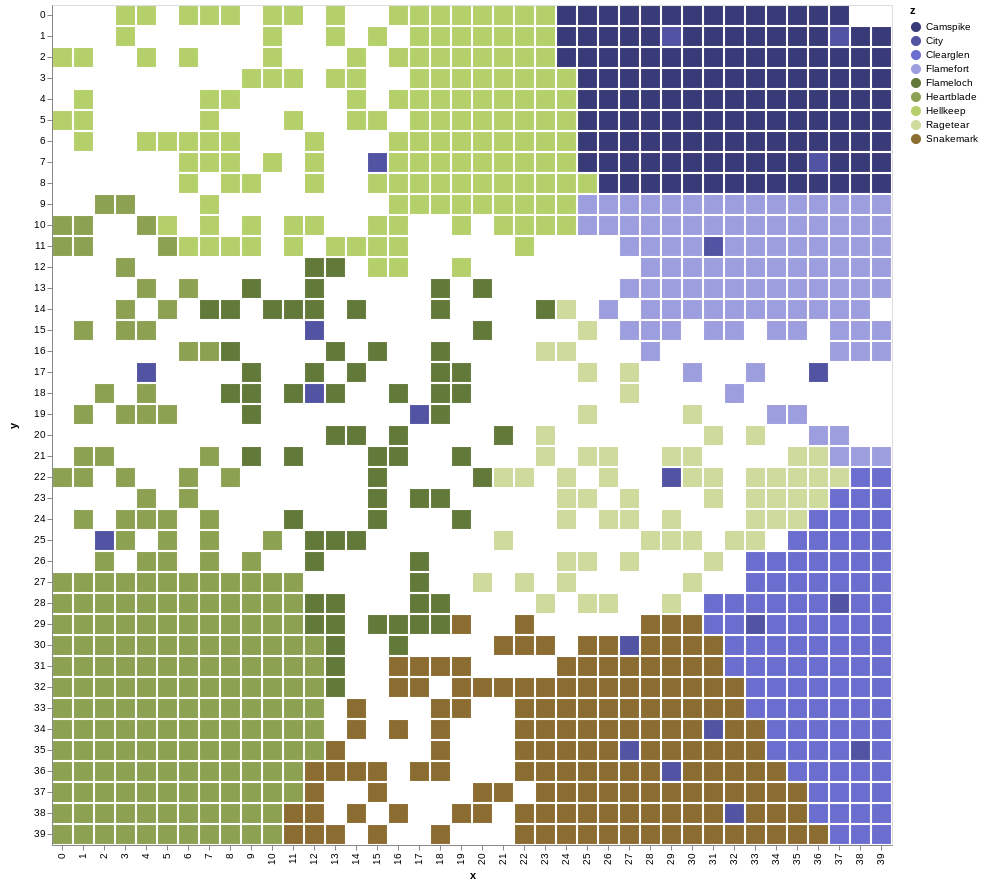

In [26]:
draw.drawboarders(world.df_features)

In [27]:
world.towns = all_towns

with open('world_2.p', 'wb') as pickle_file:
    pickle.dump(world, pickle_file)